## Basic Statistics

### Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

#### Import required libraries

In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
## To avoid warnings
import warnings
warnings.filterwarnings('ignore')

#### Load Dataset : To perform descriptive analytics, visualize data distributions, and preprocess the dataset for further analysis.

In [272]:
df=pd.read_csv('sales_data_with_discounts.csv')
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


### Descriptive Analytics for Numerical Columns

#### EDA -1 : Exploratory Data Analysis - 1
##### Objective: To compute and analyze basic statistical measures for numerical columns in the dataset.

#### Analyzing the Data

In [273]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [274]:
df.tail()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174
449,15-04-2021,Thursday,L10,C,1,Lifestyle,Jeera,M-Shoes,3100,3100,15.333300,475.332295,2624.667705


In [275]:
df.shape

(450, 13)

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


#### Identfying numerical columns in the dataset.
##### Separate Numerical and categorical variables for easy analysis

In [277]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Columns:")
print(cat_cols)
print("Numerical Columns:")
print(num_cols)

Categorical Columns:
Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')
Numerical Columns:
['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']


### Statistics Summary

#### Identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

In [278]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


### From the statistics summary, we can infer the below findings :

##### 1) It looks like Total Sales Value, Discount Amount and Net Sales Value, there is hude difference in the mean and median so far the 
##### the Total sales Data, , Discount Amount and Net Sales Value the mean value is higher than the median the data is right-skewed. The data have outliers

##### 2) On average of Total Sale Value are ~33k. The range shows a huge difference between min and max as max values show 1,964K shows the evidence of an outlier. This record can be removed.

##### 3) The max Discount Amount is ~25k which is quite weird, such a high discount amount on sales. There may be an outlier or data entry issue.

## Descriptive Statistics for Categorical Columns

In [279]:
df.describe(include=object)

,Date,Day,SKU,City,BU,Brand,Model
count,450,450,450,450,450,450,450
unique,15,7,30,1,3,9,30
top,01-04-2021,Thursday,M01,C,Mobiles,Jeera,RU-10
freq,30,90,15,450,150,90,15


In [280]:
df.dtypes

Date                  object
Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

In [281]:
df.nunique()

Date                  15
Day                    7
SKU                   30
City                   1
Volume                22
BU                     3
Brand                  9
Model                 30
Avg Price             25
Total Sales Value    135
Discount Rate (%)    450
Discount Amount      450
Net Sales Value      450
dtype: int64

In [282]:
df['BU'].unique()

array(['Mobiles', 'FMCG', 'Lifestyle'], dtype=object)

In [283]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
445    False
446    False
447    False
448    False
449    False
Length: 450, dtype: bool

#### Checking for the missing values or null values

In [284]:
[features for features  in df.columns if df[features].isnull().sum()>0]

[]

In [285]:
df.isnull().sum()

Date                 0
Day                  0
SKU                  0
City                 0
Volume               0
BU                   0
Brand                0
Model                0
Avg Price            0
Total Sales Value    0
Discount Rate (%)    0
Discount Amount      0
Net Sales Value      0
dtype: int64

#### No missing values or null values availbale in the dataset

### Data Reduction

#### Remove City column from dataset, the column have variance = 0, assuming they don’t have any predictive power to predict the dependent variable.

In [286]:
df = df.drop(['City'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   Volume             450 non-null    int64  
 4   BU                 450 non-null    object 
 5   Brand              450 non-null    object 
 6   Model              450 non-null    object 
 7   Avg Price          450 non-null    int64  
 8   Total Sales Value  450 non-null    int64  
 9   Discount Rate (%)  450 non-null    float64
 10  Discount Amount    450 non-null    float64
 11  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(6)
memory usage: 42.3+ KB


In [287]:
df.head()

,Date,Day,SKU,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


#### Updating the datatype for the date column from object to datetime, as we require the date column in data visualization for better understanding

In [288]:
df['Date']=pd.to_datetime(df['Date'],format='mixed')

In [289]:
df.dtypes

Date                 datetime64[ns]
Day                          object
SKU                          object
Volume                        int64
BU                           object
Brand                        object
Model                        object
Avg Price                     int64
Total Sales Value             int64
Discount Rate (%)           float64
Discount Amount             float64
Net Sales Value             float64
dtype: object

#### Renaming the column names (Removing Spaces, Special characters, Making all the columns names in simple standard form)

In [290]:
df=df.rename(columns={ \
    'Avg Price':'Avg_Price', \
    'Total Sales Value':'Total_Sales_Value', \
    'Discount Rate (%)':'Discount_Rate', \
    'Discount Amount':'Discount_Amount', \
    'Net Sales Value':'Net_Sales_Value', \
})

In [291]:
df.columns

Index(['Date', 'Day', 'SKU', 'Volume', 'BU', 'Brand', 'Model', 'Avg_Price',
       'Total_Sales_Value', 'Discount_Rate', 'Discount_Amount',
       'Net_Sales_Value'],
      dtype='object')

### DATA VISUALISATION

#### Histograms for the numerical columns in dataset

In [292]:
## Getting All numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols

['Volume',
 'Avg_Price',
 'Total_Sales_Value',
 'Discount_Rate',
 'Discount_Amount',
 'Net_Sales_Value']

### Histogram for Volume Column

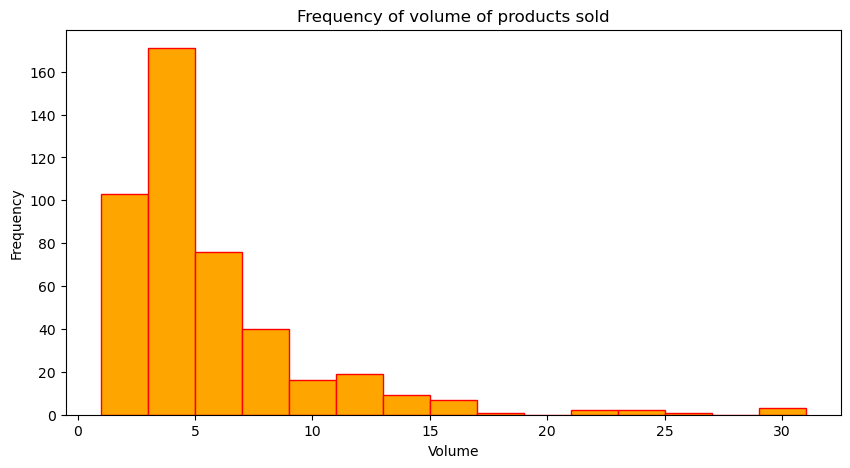

In [293]:
plt.figure(figsize=(10,5))
plt.hist(x='Volume', data=df, bins=15, color="orange", edgecolor="red")
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title("Frequency of volume of products sold")
plt.show()

### Observation: 
##### The data in the Volumn Columns is distributed on left side with tail on the right side. The data is positively skewed.
##### the mean value is greater than the median and moves towards the right, and the mode occurs at the highest frequency of the distribution.

### Histogram for Avg Prize Column

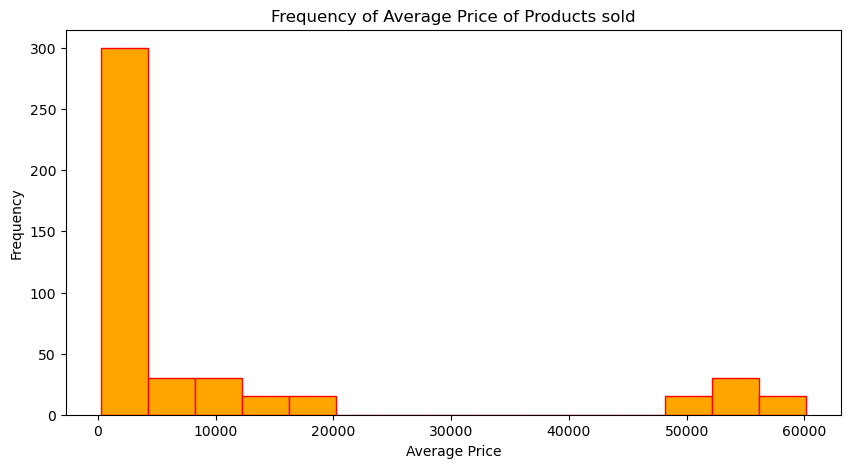

In [294]:
plt.figure(figsize=(10,5))
plt.hist(x='Avg_Price', data=df, bins=15, color='orange', edgecolor='red')
plt.xlabel("Average Price")
plt.ylabel("Frequency")
plt.title("Frequency of Average Price of Products sold")
plt.show()

### Observation: 
##### The data in the Averare Price Column is distributed on left side with tail on the right side. The data is positively skewed.
##### the mean value is greater than the median and moves towards the right, and the mode occurs at the highest frequency of the distribution.
##### The data is highly positively skewed and the data points are mostly distributed towords left
##### The most of the products with average price around nearly between the range from 1000 to 3000 have more frequency

### Histogram for Total Sales Value Column

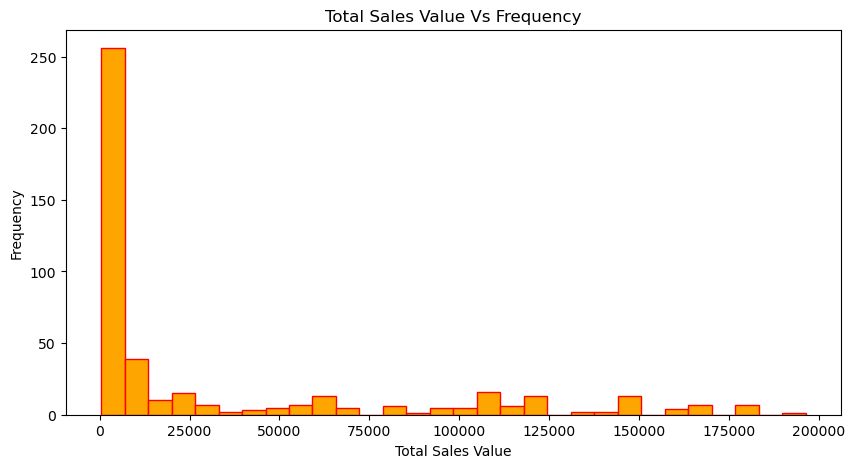

In [295]:
plt.figure(figsize=(10,5))
plt.hist(x='Total_Sales_Value', data=df, bins=30, color='orange', edgecolor='red')
plt.xlabel('Total Sales Value')
plt.ylabel('Frequency')
plt.title('Total Sales Value Vs Frequency')
plt.show()

### Observation: 
##### The data in the Total Sales Price Column is distributed on left side with tail on the right side. The data is positively skewed.
##### The most of the products with average price around nearly between the range from 1000 to 3000 have more frequency

### Histogram for Discount Rate Column 

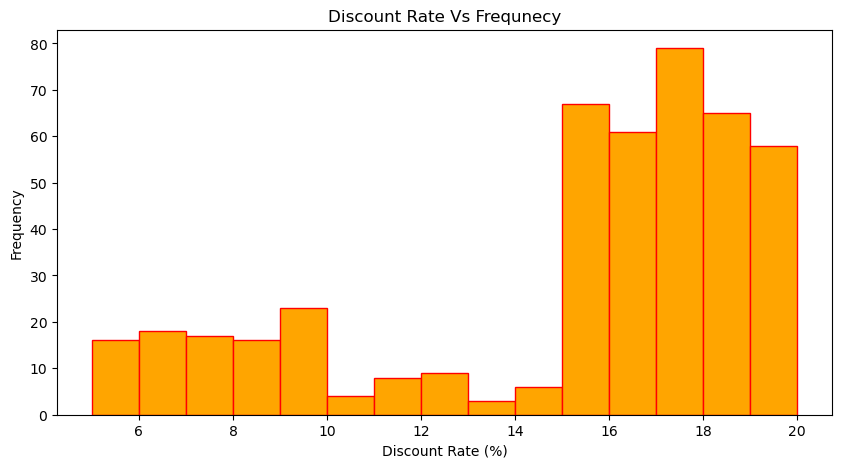

In [296]:
plt.figure(figsize=(10,5))
plt.hist(x='Discount_Rate', data=df, bins=15,color='orange',edgecolor='red')
plt.xlabel('Discount Rate (%)')
plt.ylabel('Frequency')
plt.title('Discount Rate Vs Frequnecy')
plt.show()

### Observation: 
##### The data in the Discount Rate Column is distributed on right side with tail on the left side. The data is negatively skewed.

### Histogram for Discount Amount Column

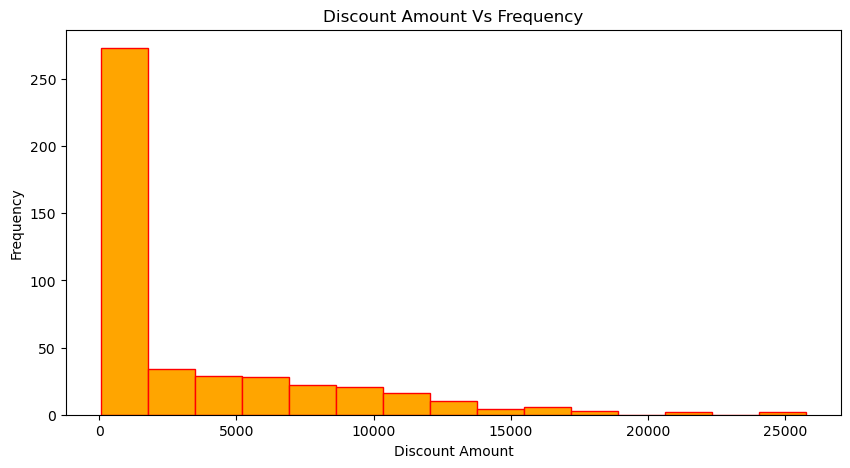

In [297]:
plt.figure(figsize=(10,5))
plt.hist(x='Discount_Amount', data=df, bins=15,color='orange',edgecolor='red')
plt.xlabel('Discount Amount')
plt.ylabel('Frequency')
plt.title('Discount Amount Vs Frequency')
plt.show()

### Observation: 
##### The data in the Discount Amount Column is distributed on left side with tail on the right side. The data is positively skewed.
##### The data is highly skewed in the positive side and there is huge difference between min and max values, there may be the chances of presence of the outliers 

### Histogram for Net Sales Value Column

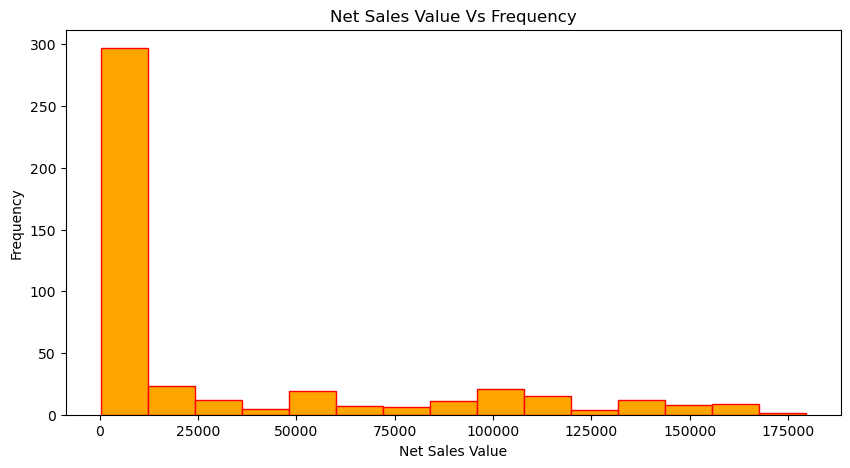

In [298]:
plt.figure(figsize=(10,5))
plt.hist(x='Net_Sales_Value', data=df,bins=15,color='orange',edgecolor='red')
plt.xlabel('Net Sales Value')
plt.ylabel('Frequency')
plt.title('Net Sales Value Vs Frequency')
plt.show()

### Observation: 
##### The data in the Net Sales Value Column is distributed on left side with tail on the right side. The data is positively skewed

## Checking Outliers (Visualising using Box Whisker Plots)
#### Checking for Ourtliers presence and the interquartile range, checking if there is any unusual distribution for the datapoints

In [299]:
num_cols

['Volume',
 'Avg_Price',
 'Total_Sales_Value',
 'Discount_Rate',
 'Discount_Amount',
 'Net_Sales_Value']

### Box Plot for Volume Column

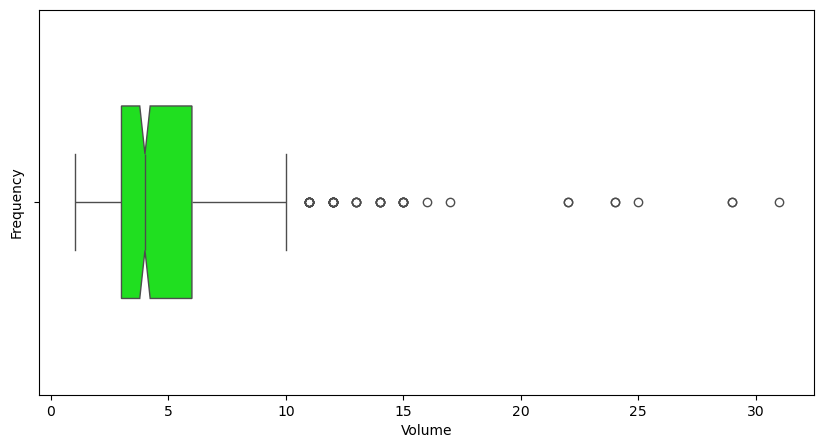

In [300]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Volume'], data=df, color='lime',width=0.5, orient='h', notch=True)
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.show()

### Observation :
##### It is observed that the there is presence of huge number of outliers on the upper exterem level in the Volume column

### Box Plot for Avg Price Column

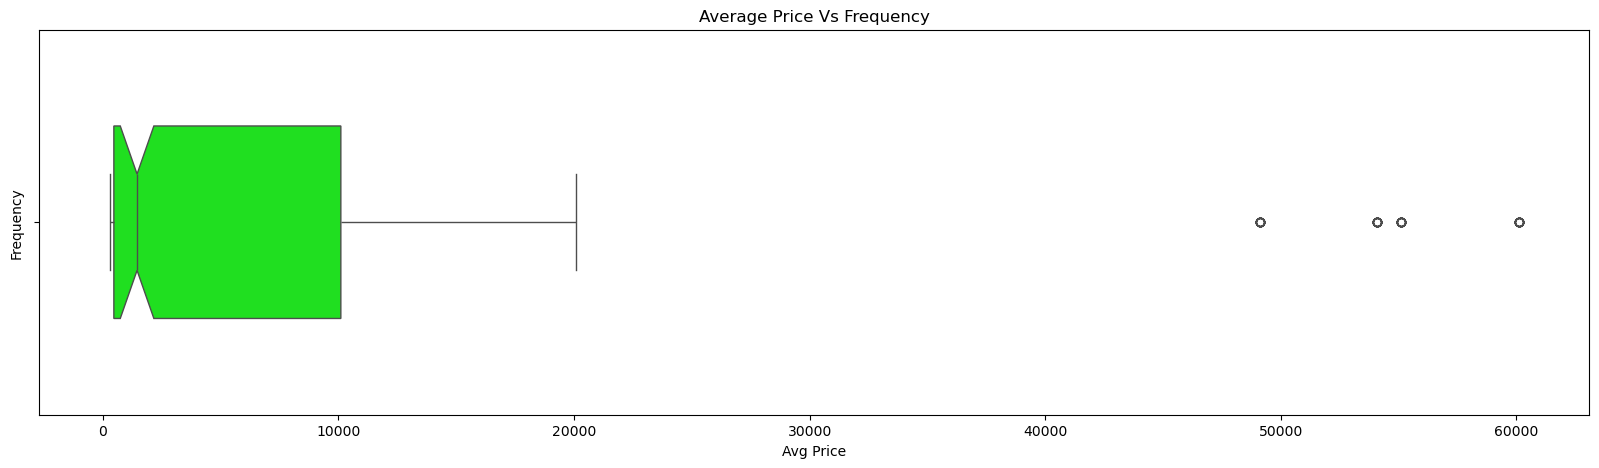

In [301]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df['Avg_Price'], data=df, color='lime', width=0.5,orient='h',notch=True)
plt.xlabel("Avg Price")
plt.ylabel("Frequency")
plt.title("Average Price Vs Frequency")
plt.show()

### Observation :
##### It is observed that the there is presence outliers on the upper exterem level in Avg Price column

### Box Plot for Total Sales Value Column

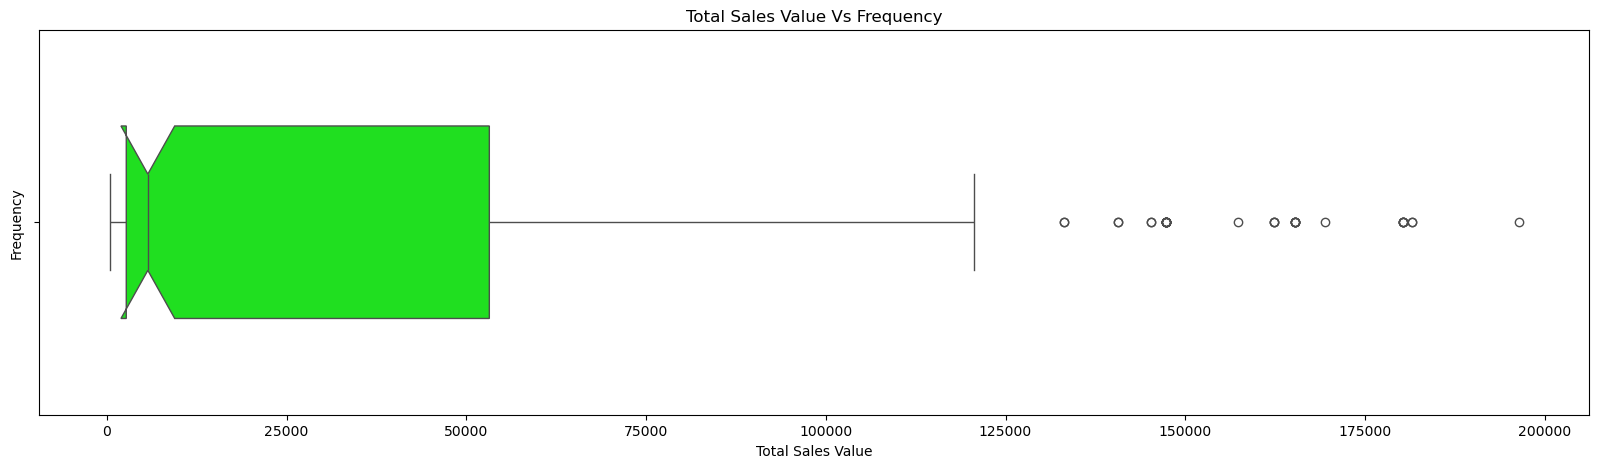

In [302]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df['Total_Sales_Value'], data=df, color='lime', width=0.5, orient='h',notch=True)
plt.xlabel('Total Sales Value')
plt.ylabel('Frequency')
plt.title('Total Sales Value Vs Frequency')
plt.show()

### Observation :
##### It is observed that the there is presence of huge number of outliers on the upper exterem level in the Total Sales Value column

### Box Plot for Discount Rate (%) Column

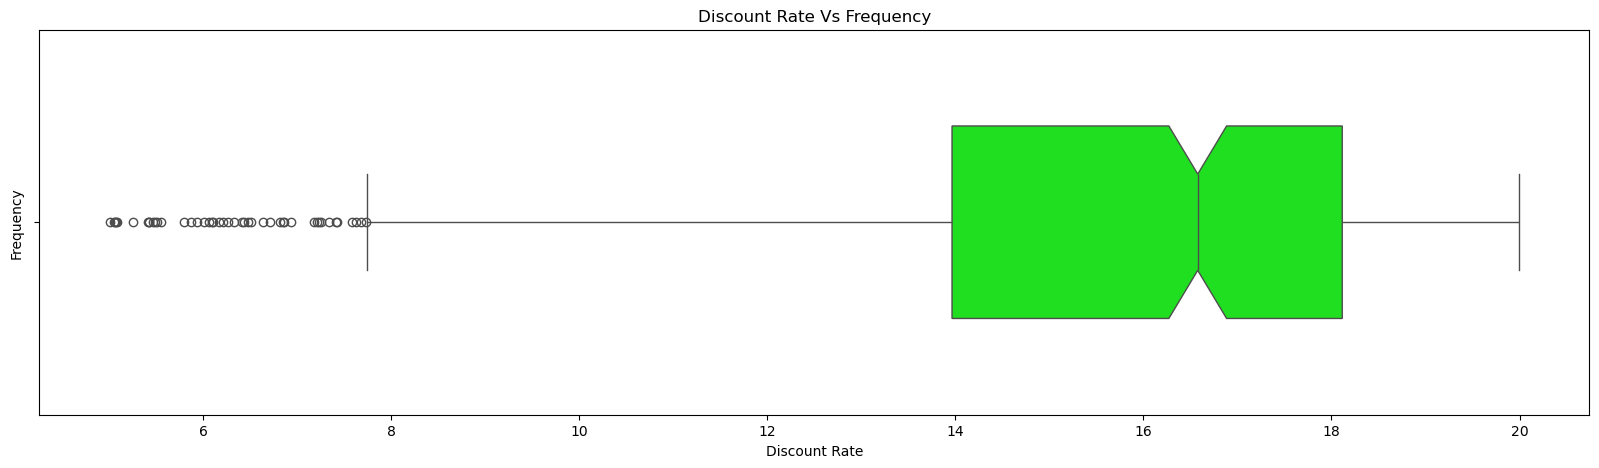

In [303]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df['Discount_Rate'],data=df,color='lime',width=0.5,orient='h',notch=True)
plt.xlabel('Discount Rate')
plt.ylabel('Frequency')
plt.title('Discount Rate Vs Frequency')
plt.show()

### Observation :
##### It is observed that the there is presence of huge number of outliers on the lower exterem level in the Discount Rate column

### Box Plot for Discount Amount Column

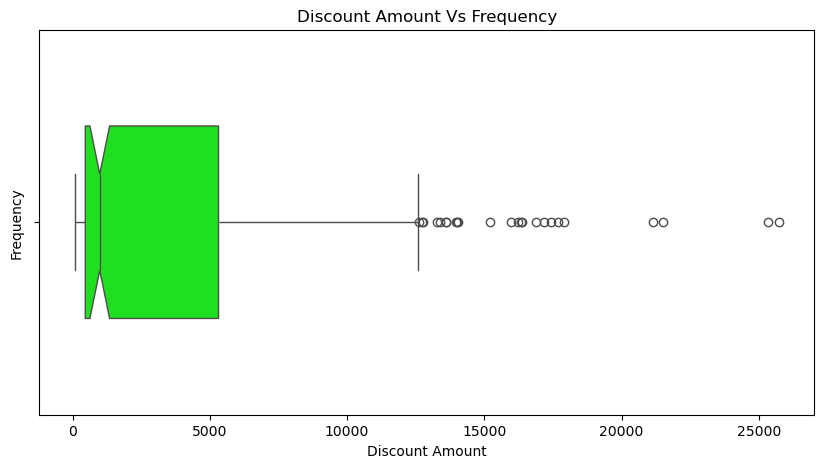

In [304]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Discount_Amount'], data=df, color='lime', width=0.5,orient='h',notch=True)
plt.xlabel('Discount Amount')
plt.ylabel('Frequency')
plt.title('Discount Amount Vs Frequency')
plt.show()

### Observation :
##### It is observed that the there is presence of huge number of outliers on the upper extreme level in the Discount Amount column

### Box Plot for Net Sales Value Column

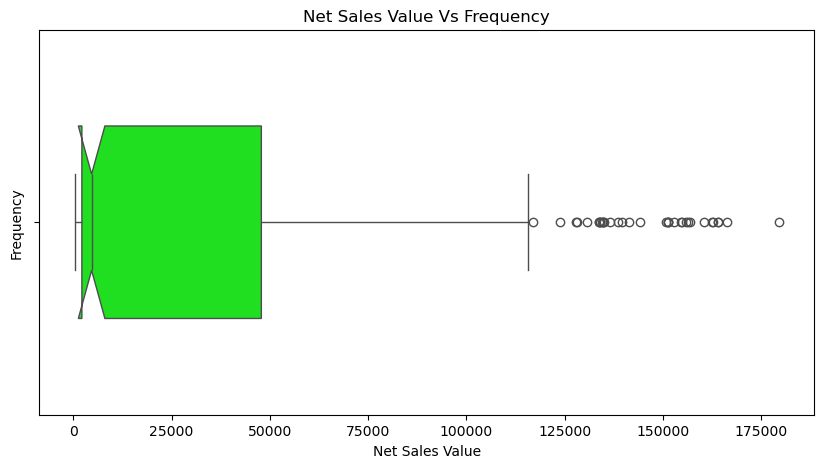

In [305]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Net_Sales_Value'], data=df, color='lime', width=0.5,orient='h',notch=True)
plt.xlabel('Net Sales Value')
plt.ylabel('Frequency')
plt.title('Net Sales Value Vs Frequency')
plt.show()

### Observation :
##### It is observed that the there is presence of huge number of outliers on the upper extreme level in the Net Sales Value column

#### Analysing the categorical columns frequencies using the bar charts

In [306]:
cat_cols

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

In [307]:
df.head()

,Date,Day,SKU,Volume,BU,Brand,Model,Avg_Price,Total_Sales_Value,Discount_Rate,Discount_Amount,Net_Sales_Value
0,2021-01-04,Thursday,M01,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,2021-01-04,Thursday,M02,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,2021-01-04,Thursday,M03,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,2021-01-04,Thursday,M04,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,2021-01-04,Thursday,M05,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


### Bar Chart for Daywise Total Sale Frequency 

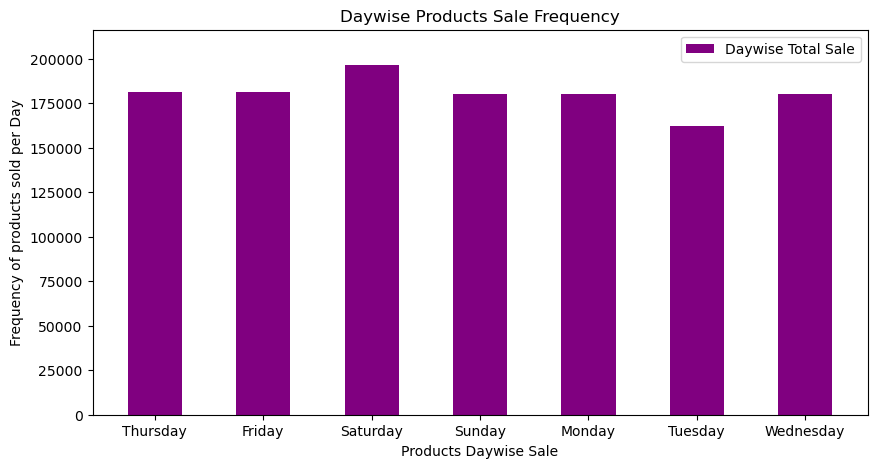

In [308]:
plt.figure(figsize=(10,5))
plt.bar(x=df['Day'], height=df['Total_Sales_Value'],width=0.5, color='purple', label='Daywise Total Sale')
plt.xlabel('Products Daywise Sale')
plt.ylabel('Frequency of products sold per Day')
plt.title('Daywise Products Sale Frequency')
plt.ylim(0, max(df['Total_Sales_Value']) + 20000)
plt.legend()
plt.show()

### Observations :
#### From the bar chart with Daywise Total Sale, we can infer that there is more sale on satureday and less sale on the Tuesday, other than that the total sale is approximately same on Monday, Wednesday,Thursday, Friday and sunday.

### Bar Chart for SKU Stock Keeping Unit with Total Sale Frequency 

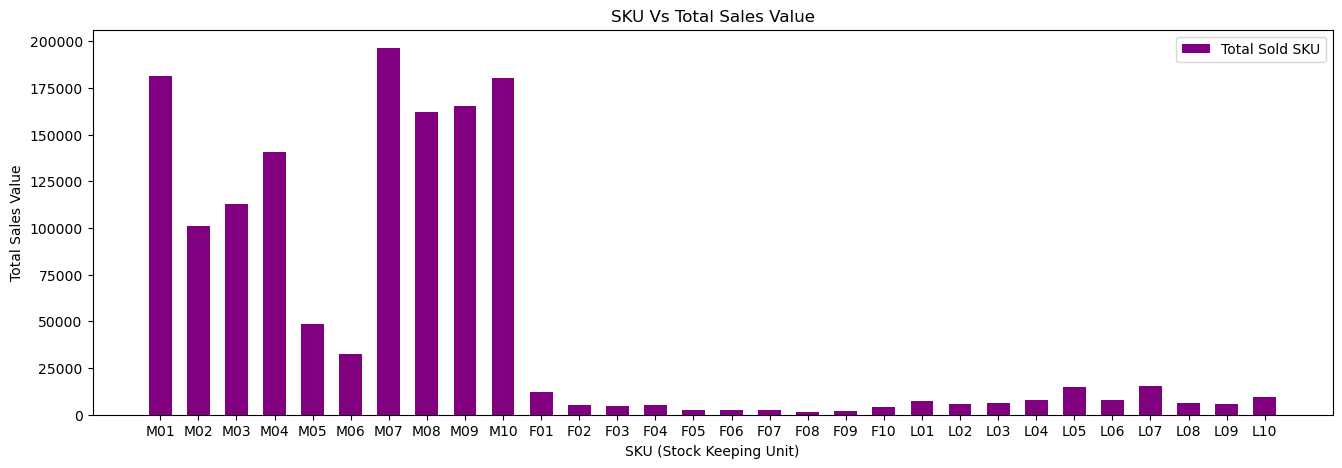

In [309]:
plt.figure(figsize=(16,5))
plt.bar(x=df['SKU'], height=df['Total_Sales_Value'], width=0.6, color='purple', label='Total Sold SKU')
plt.xlabel('SKU (Stock Keeping Unit)')
plt.ylabel('Total Sales Value')
plt.title('SKU Vs Total Sales Value')
plt.legend()
plt.show()

### Observations : 
#### From the SKU Bar chart we can infer that, Products having SKU M07 having a highest sold product, after that products with SKU M01 and M10 are mostly sold. We can infer that products in SKU ranging from M01 to M10, are most likely sold products. other than available products.

### Bar Chart for BU Business Unit with Total Sale Frequency 

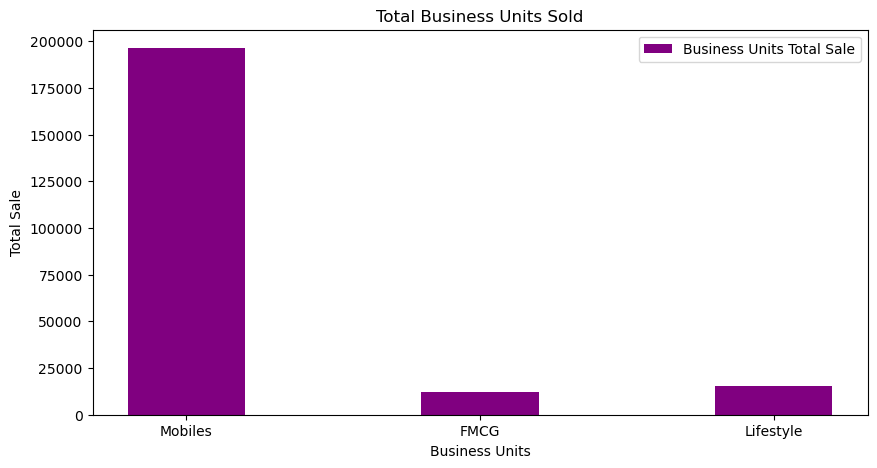

In [310]:
plt.figure(figsize=(10,5))
plt.bar(x=df['BU'], height=df['Total_Sales_Value'],width=0.4,color='purple',label='Business Units Total Sale')
plt.xlabel('Business Units')
plt.ylabel('Total Sale')
plt.title('Total Business Units Sold')
plt.legend()
plt.show()

### Observation : 
#### From the above bar graph we can infer that that there is highest sale for Mobile business units with worth total sale around approximately $180000 other than available business units like FMCG and Lifestyle.

### Bar Chart for Total Sale Frequency for mostly sold Brand 

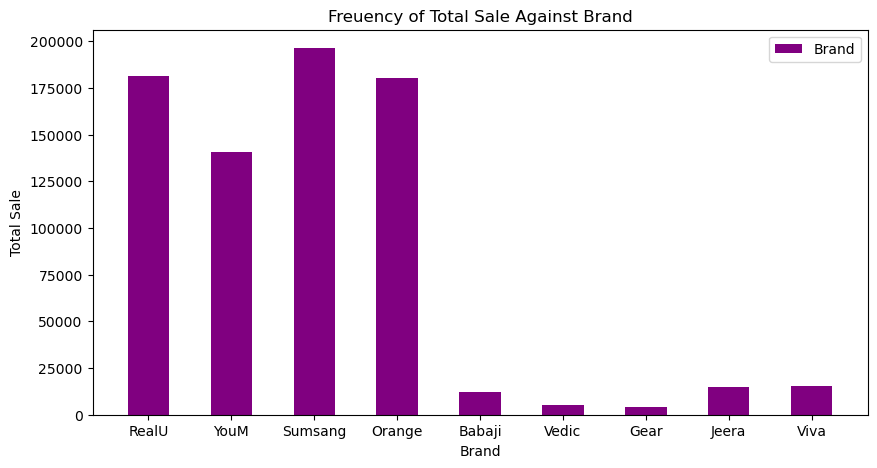

In [311]:
plt.figure(figsize=(10,5))
plt.bar(x=df['Brand'], height=df['Total_Sales_Value'], width=0.5,color='purple',label='Brand')
plt.xlabel('Brand')
plt.ylabel('Total Sale')
plt.title('Freuency of Total Sale Against Brand')
plt.legend()
plt.show()

### Observations :
#### We can observe that the brand Samsang have highest sale, where Orange and RealU are most likeky sold Brands after Samsang with YouM. The brands Babaji, Vedic, Gear, Jeera and Viva have very less sale.

### Bar Chart for Total Sale Frequency for mostly sold Models

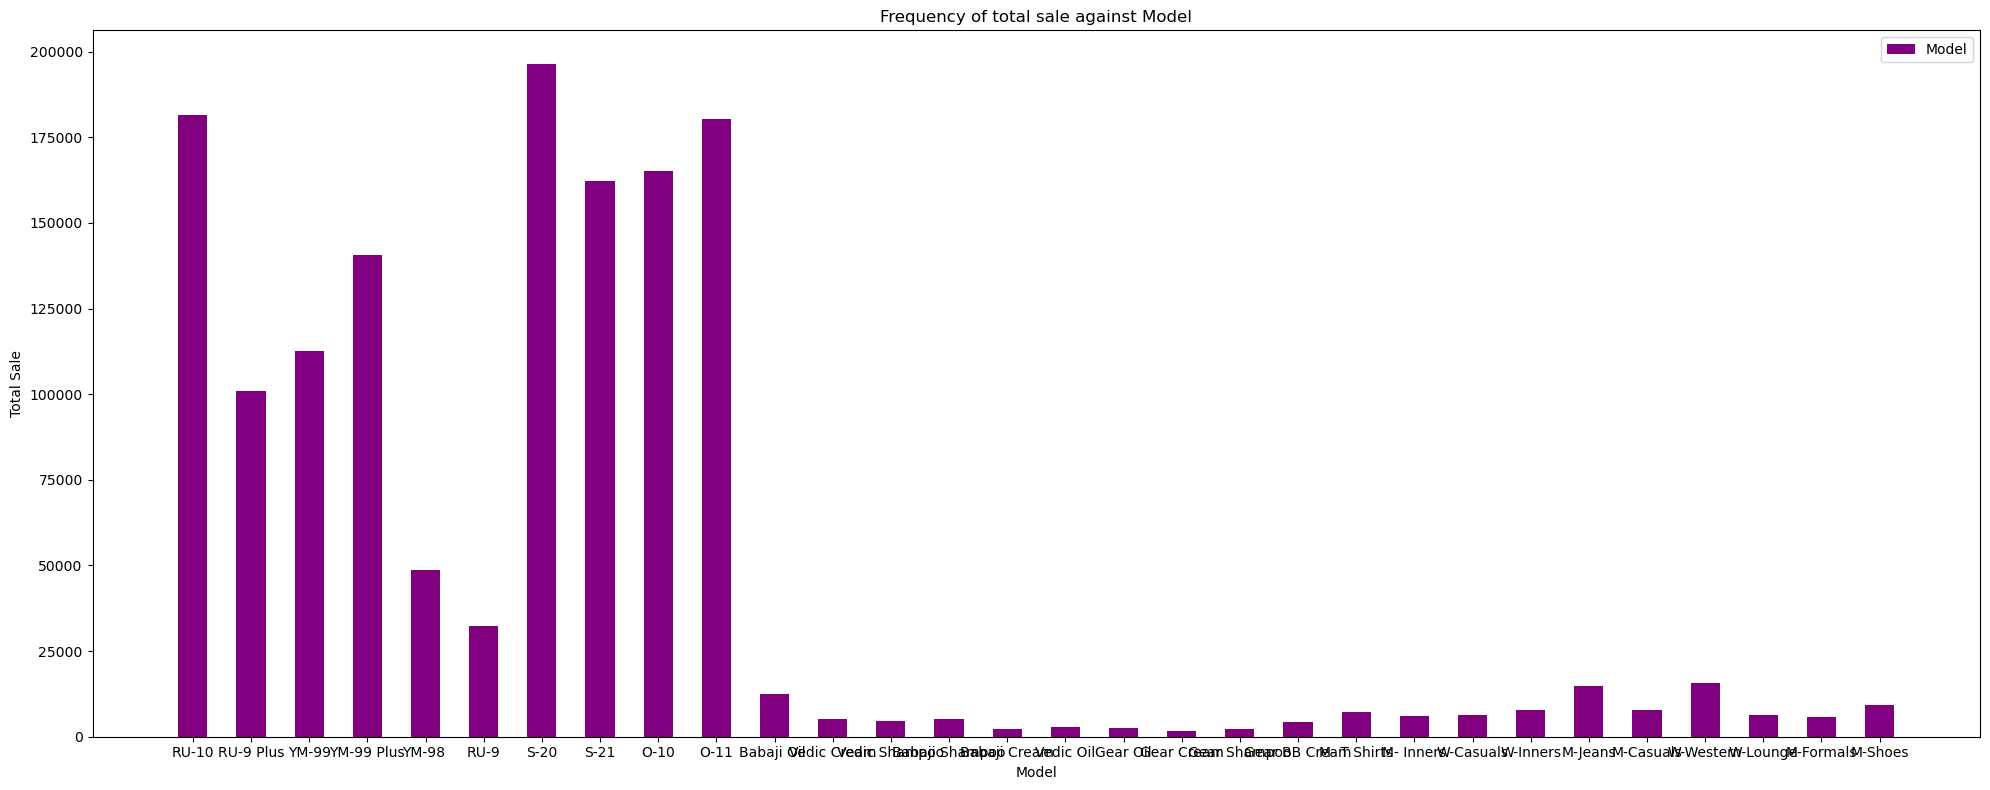

In [312]:
plt.figure(figsize=(20,8))
plt.bar(x=df['Model'], height=df['Total_Sales_Value'],width=0.5,color='purple',label='Model')
plt.xlabel('Model')
plt.ylabel('Total Sale')
plt.title('Frequency of total sale against Model')
plt.legend()
plt.tight_layout()
plt.show()


### Observations :
#### We can observe that the Model number S20 have highest sale, where RU10 and O11 are most likeky sold models after Model S20. We can infer that mobile products have more sale other than the products.

## There is a presnce of huge number of outliers, it needs to be treated before going to normalisation and standardisation of the data,


## Treating Outliers

<Axes: >

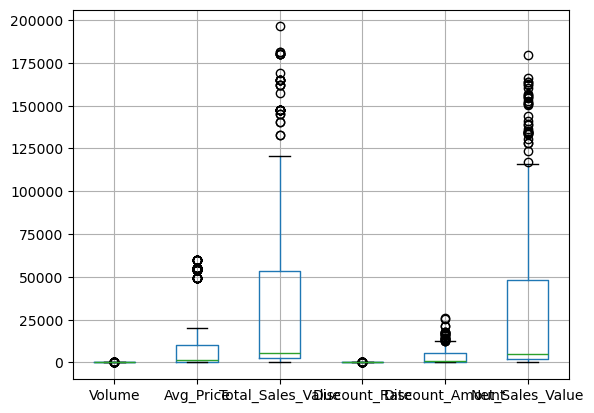

In [313]:
df.boxplot()

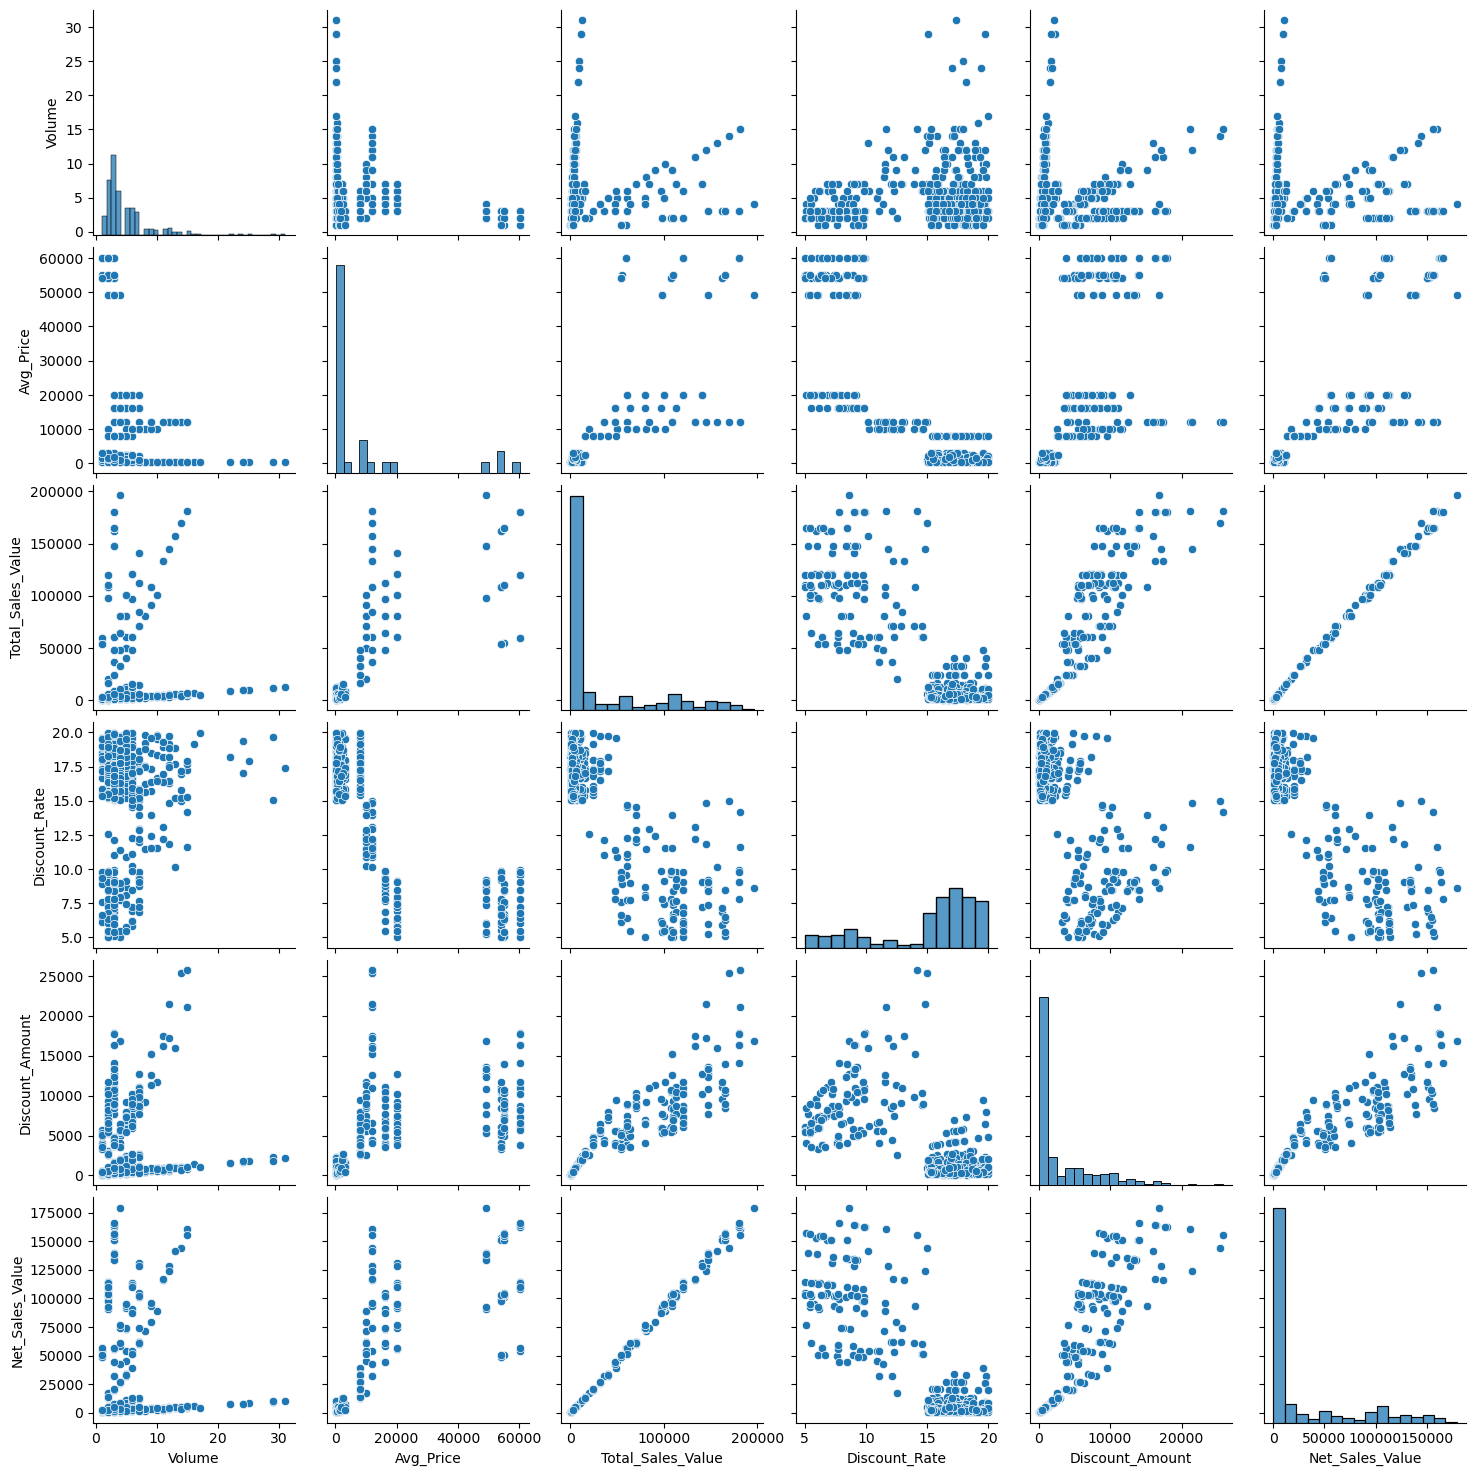

In [314]:
sns.pairplot(df)

#### Replacing the upper extrem outliers with upper value and lower extreme outliers with lower value using Interquartil range

In [316]:
def outlier_Detection(df,columns):
    for col in columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        iqr=Q3-Q1
        lower=Q1-1.5*iqr
        upper=Q3+1.5*iqr
        df[col]=np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
    return df        

In [317]:
outlier_Detection(df,[['Avg_Price','Volume','Total_Sales_Value','Discount_Rate','Discount_Amount','Net_Sales_Value']])

,Date,Day,SKU,Volume,BU,Brand,Model,Avg_Price,Total_Sales_Value,Discount_Rate,Discount_Amount,Net_Sales_Value
0,2021-01-04,Thursday,M01,10.5,Mobiles,RealU,RU-10,12100.0,128950.0,11.654820,12600.549611,116316.469161
1,2021-01-04,Thursday,M02,10.0,Mobiles,RealU,RU-9 Plus,10100.0,101000.0,11.560498,11676.102961,89323.897039
2,2021-01-04,Thursday,M03,7.0,Mobiles,YouM,YM-99,16100.0,112700.0,9.456886,10657.910157,102042.089843
3,2021-01-04,Thursday,M04,6.0,Mobiles,YouM,YM-99 Plus,20100.0,120600.0,7.740579,8364.074702,112235.925298
4,2021-01-04,Thursday,M05,3.0,Mobiles,YouM,YM-98,8100.0,24300.0,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...
445,2021-04-15,Thursday,L06,2.0,Lifestyle,Jeera,M-Casuals,1300.0,2600.0,15.475687,402.367873,2197.632127
446,2021-04-15,Thursday,L07,6.0,Lifestyle,Viva,W-Western,2600.0,15600.0,17.057027,2660.896242,12939.103758
447,2021-04-15,Thursday,L08,2.0,Lifestyle,Viva,W-Lounge,1600.0,3200.0,18.965550,606.897606,2593.102394
448,2021-04-15,Thursday,L09,3.0,Lifestyle,Jeera,M-Formals,1900.0,5700.0,16.793014,957.201826,4742.798174


<Axes: >

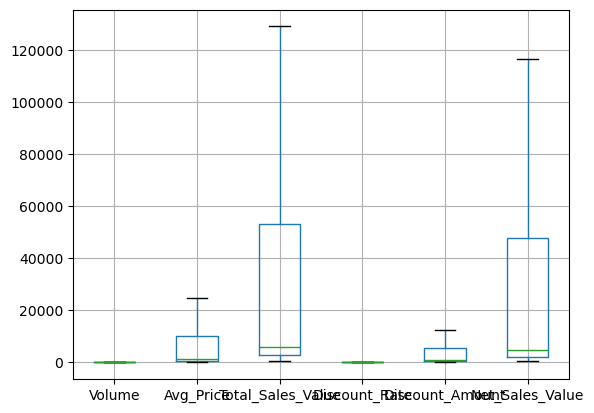

In [318]:
df.boxplot()

#### We can see there is very high number range, we standardize the numerical data to scale in uniform range using Z- score = x-mu/sigma
#### Where x are datapoint, mu is mean of column and sigma is standard deviation of the column

In [319]:
num_cols

['Volume',
 'Avg_Price',
 'Total_Sales_Value',
 'Discount_Rate',
 'Discount_Amount',
 'Net_Sales_Value']

In [257]:
df.head(1)

,Date,Day,SKU,Volume,BU,Brand,Model,Avg_Price,Total_Sales_Value,Discount_Rate,Discount_Amount,Net_Sales_Value
0,2021-01-04,Thursday,M01,10.5,Mobiles,RealU,RU-10,12100.0,128950.0,11.65482,12600.549611,116316.469161


In [320]:
df1 = df.drop(columns=['Date', 'Day', 'SKU', 'BU', 'Brand', 'Model'], axis=1)
df1

,Volume,Avg_Price,Total_Sales_Value,Discount_Rate,Discount_Amount,Net_Sales_Value
0,10.5,12100.0,128950.0,11.654820,12600.549611,116316.469161
1,10.0,10100.0,101000.0,11.560498,11676.102961,89323.897039
2,7.0,16100.0,112700.0,9.456886,10657.910157,102042.089843
3,6.0,20100.0,120600.0,7.740579,8364.074702,112235.925298
4,3.0,8100.0,24300.0,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2.0,1300.0,2600.0,15.475687,402.367873,2197.632127
446,6.0,2600.0,15600.0,17.057027,2660.896242,12939.103758
447,2.0,1600.0,3200.0,18.965550,606.897606,2593.102394
448,3.0,1900.0,5700.0,16.793014,957.201826,4742.798174


In [322]:
df1['Volume'] = pd.DataFrame(df1['Volume'] - df1['Volume'].mean())/df1['Volume'].std(ddof=0)
df1['Avg_Price'] = pd.DataFrame(df1['Avg_Price'] - df1['Avg_Price'].mean())/df1['Avg_Price'].std(ddof=0)
df1['Total_Sales_Value'] = pd.DataFrame(df1['Total_Sales_Value'] - df1['Total_Sales_Value'].mean())/df1['Total_Sales_Value'].std(ddof=0)
df1['Discount_Rate'] = pd.DataFrame(df1['Discount_Rate'] - df1['Discount_Rate'].mean())/df1['Discount_Rate'].std(ddof=0)
df1['Discount_Amount'] = pd.DataFrame(df1['Discount_Amount'] - df1['Discount_Amount'].mean())/df1['Discount_Amount'].std(ddof=0)
df1['Net_Sales_Value'] = pd.DataFrame(df1['Net_Sales_Value'] - df1['Net_Sales_Value'].mean())/df1['Net_Sales_Value'].std(ddof=0)

In [323]:
df1

,Volume,Avg_Price,Total_Sales_Value,Discount_Rate,Discount_Amount,Net_Sales_Value
0,2.133995,0.653958,2.185257,-0.929603,2.446327,2.159293
1,1.953012,0.422587,1.559089,-0.953669,2.207259,1.497922
2,0.867112,1.116699,1.821206,-1.490400,1.943947,1.809543
3,0.505145,1.579441,1.998190,-1.928310,1.350745,2.059311
4,-0.580756,0.191216,-0.159230,0.688245,0.318611,-0.202434
...,...,...,...,...,...,...
445,-0.942722,-0.595444,-0.645378,0.045280,-0.708209,-0.636840
446,0.505145,-0.445053,-0.354137,0.448755,-0.124137,-0.373653
447,-0.942722,-0.560739,-0.631936,0.935709,-0.655316,-0.627150
448,-0.580756,-0.526033,-0.575928,0.381393,-0.564725,-0.574478


In [208]:
# now iterate over the remaining columns and create a new zscore column
#df1=[]
#for col in num_cols:
    # col_zscore = col + '_zscore'
##num_cols

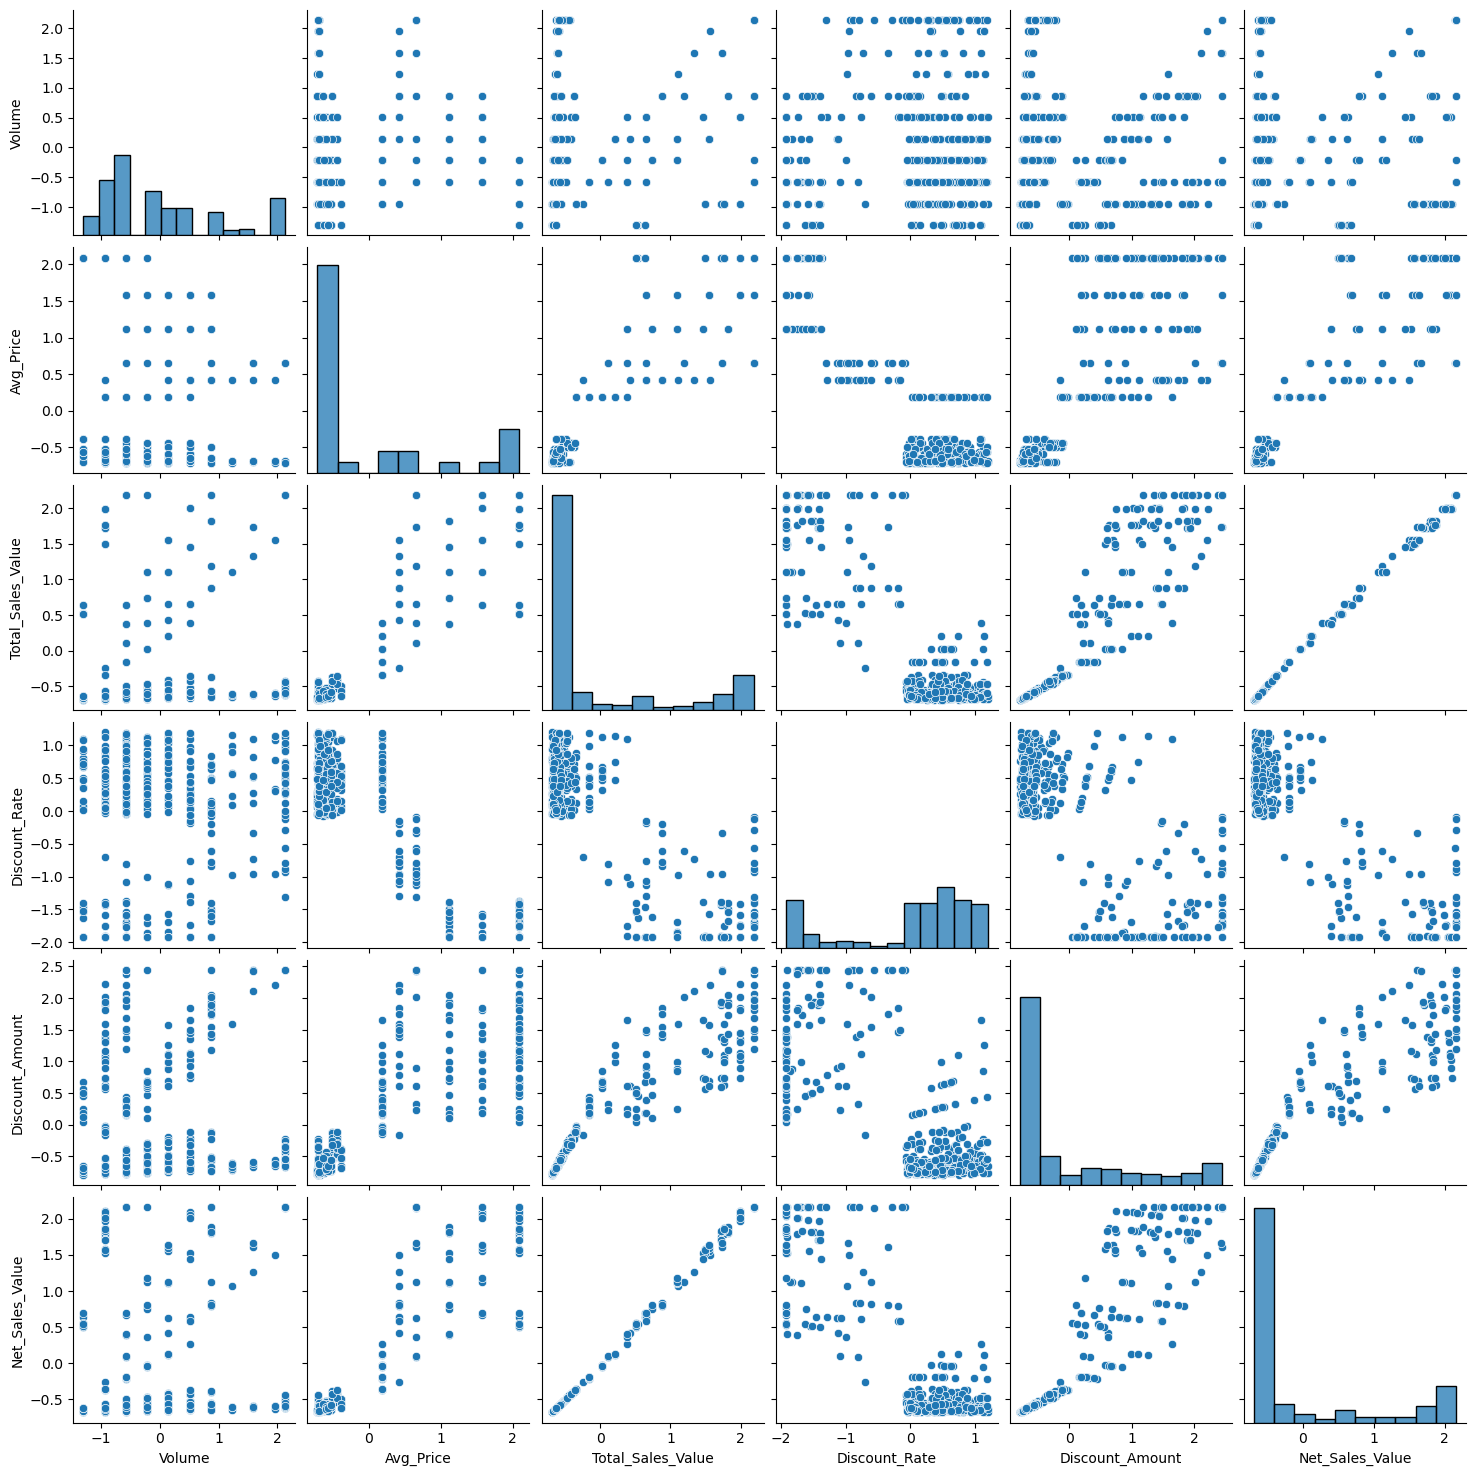

In [324]:
sns.pairplot(df1)

<Axes: xlabel='Volume', ylabel='Count'>

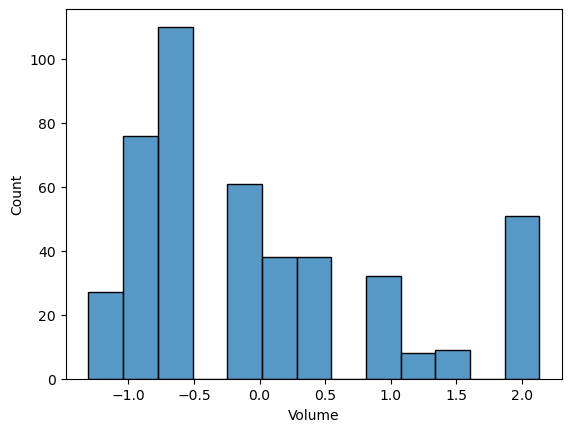

In [325]:
sns.histplot(df1['Volume'])

## Normalization 

In [326]:
df.head(1)

,Date,Day,SKU,Volume,BU,Brand,Model,Avg_Price,Total_Sales_Value,Discount_Rate,Discount_Amount,Net_Sales_Value
0,2021-01-04,Thursday,M01,10.5,Mobiles,RealU,RU-10,12100.0,128950.0,11.65482,12600.549611,116316.469161


In [327]:
df2 = df.drop(columns=['Date', 'Volume', 'Avg_Price', 'Total_Sales_Value', 'Discount_Rate', 'Discount_Amount', 'Net_Sales_Value'], axis=1)
df2

,Day,SKU,BU,Brand,Model
0,Thursday,M01,Mobiles,RealU,RU-10
1,Thursday,M02,Mobiles,RealU,RU-9 Plus
2,Thursday,M03,Mobiles,YouM,YM-99
3,Thursday,M04,Mobiles,YouM,YM-99 Plus
4,Thursday,M05,Mobiles,YouM,YM-98
...,...,...,...,...,...
445,Thursday,L06,Lifestyle,Jeera,M-Casuals
446,Thursday,L07,Lifestyle,Viva,W-Western
447,Thursday,L08,Lifestyle,Viva,W-Lounge
448,Thursday,L09,Lifestyle,Jeera,M-Formals


In [328]:
# Get Dummies()
df2=pd.get_dummies(df2,columns=['Day','SKU','BU','Brand','Model'],dtype=int)
df2

,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,SKU_F01,SKU_F02,SKU_F03,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
447,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
448,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
